In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the new location (Dataset folder)
df = pd.read_excel('Dataset/Aqar_Riyadh.xlsx')

# Check the first 10 rows of the dataset
df.head(10)


,Property_ID,Property Type,Bedrooms,Bathrooms,Area,Price,Description,Location,District,City,Agency_Name
0,A877409248,دور,6,5.0,214 م2,"730,000","دور للبيع في بدر, جنوب الرياض",بدر، جنوب الرياض، الرياض,حي بدر,الرياض,NaN
1,W448904463,فیلا,5,6.0,440 م2,"4,800,000",فيلا للبيع في الملك فهد، شمال الرياض,الملك فهد، شمال الرياض، الرياض,حي الملك فهد,الرياض,NaN
2,M187516680,فیلا,11,6.0,445 م2,"5,000,000",فيلا للبيع في الوادي، شمال الرياض,الوادي، شمال الرياض، الرياض,حي الوادي,الرياض,NaN
3,H808583263,دور,6,5.0,185 م2,"1,200,000",دور للبيع في المونسية، شرق الرياض,المونسية، شرق الرياض، الرياض,حي المونسية,الرياض,NaN
4,T501925005,فیلا,6,6.0,300 م2,"980,000",فيلا للبيع في بدر، جنوب الرياض,بدر، جنوب الرياض، الرياض,حي بدر,الرياض,مؤسسة غزالة للخدمات العقارية
5,G622333075,دور,6,5.0,500 م2,"1,249,000","دور للبيع في الخليج, شرق الرياض",الخليج، شرق الرياض، الرياض,حي الخليج,الرياض,شركة سياد للاستثمار
6,L472435811,دور,5,4.0,523 م2,"1,650,000",للبيع أدوار في الريان، شرق الرياض,الريان، شرق الرياض، الرياض,حي الريان,الرياض,شركة سياد للاستثمار
7,G066192381,دور,4,3.0,"3,098 م2","1,350,000",✴️دور علوي مودرن للبيع - مشروع ذا بارك✴️,الربوة، وسط الرياض، الرياض,حي الربوة,الرياض,مساكن ركاز للعقارات
8,B566435343,دور,3,3.0,500 م2,"800,000",دور للبيع في شبرا، غرب الرياض,شبرا، غرب الرياض، الرياض,حي شبرا,الرياض,شركة نجمة التميز للعقارات
9,S442527647,فیلا,5,5.0,500 م2,"3,500,000",فيلا للبيع في الملز، شرق الرياض,الملز، شرق الرياض، الرياض,حي الملز,الرياض,مؤسسة سعود علي عبدالعزيز السقامي للعقارات


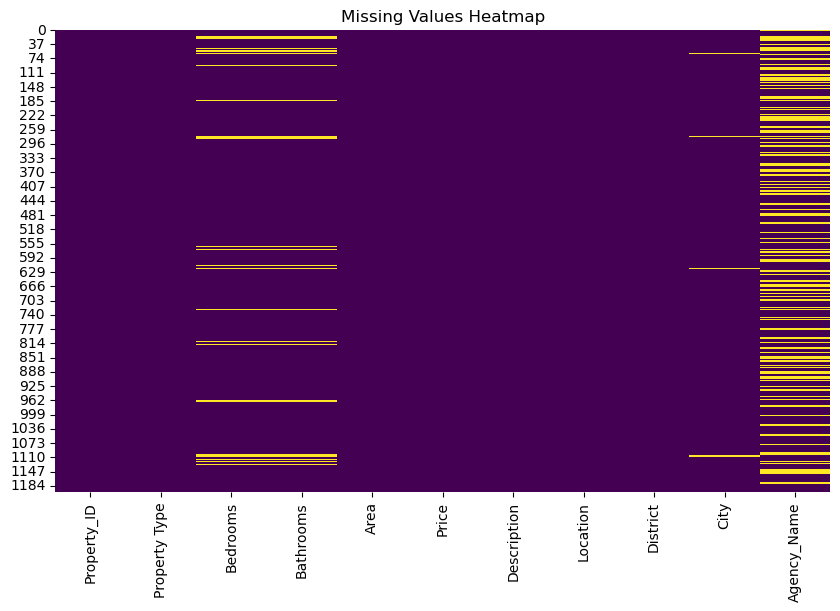

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Dataset/Aqar_Riyadh.xlsx')

# Plot missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


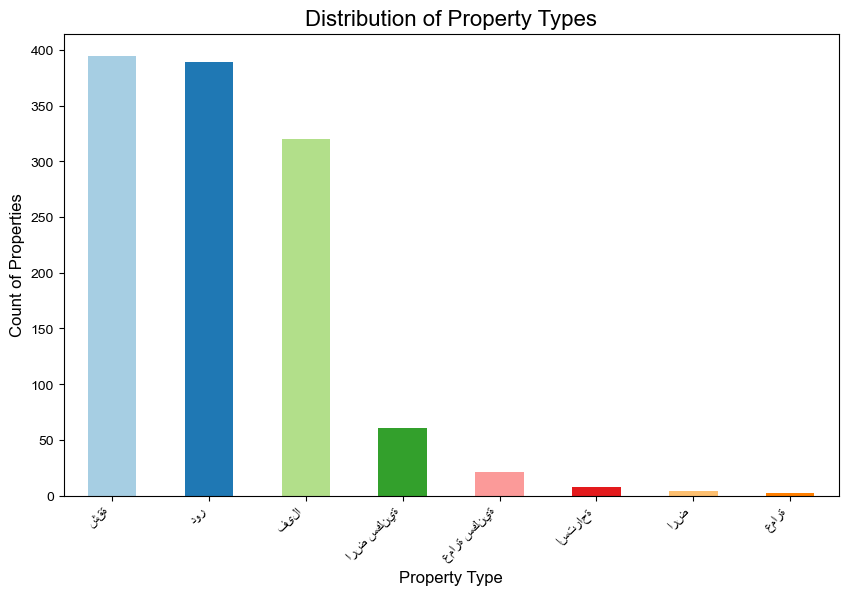

In [68]:
# Plot a bar chart for property type distribution
plt.figure(figsize=(10, 6))
property_type_count.plot(kind='bar', color=plt.cm.Paired.colors)

# Title and labels
plt.title('Distribution of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.show()


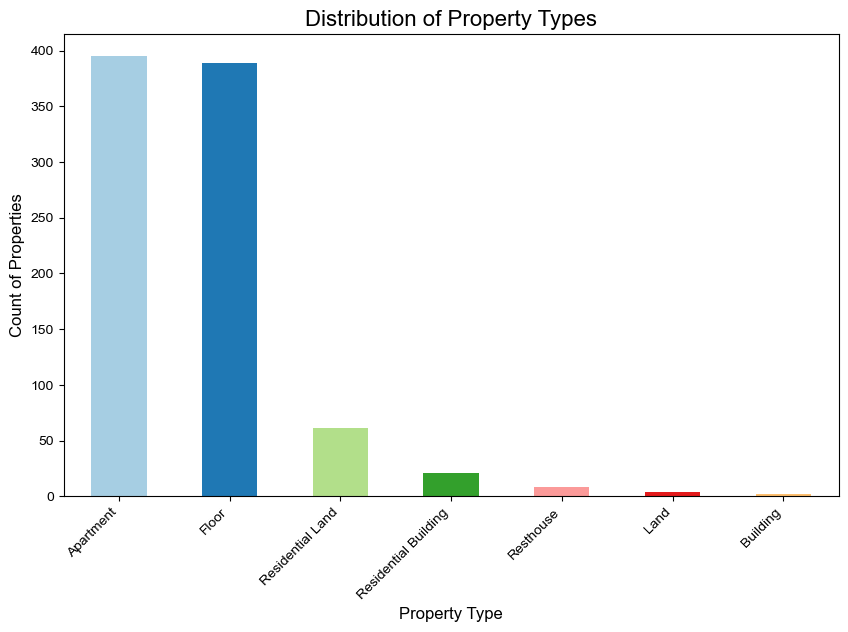

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already loaded with your dataset

# Create the translation dictionary
translation_dict = {
    'فيلا': 'Villa',
    'شقة': 'Apartment',
    'ارض': 'Land',
    'ارض سكنية': 'Residential Land',
    'استراحة': 'Resthouse',
    'دور': 'Floor',
    'عمارة': 'Building',
    'عمارة سكنية': 'Residential Building'
}

# Translate 'Property Type' using the dictionary
df['Property Type (Translated)'] = df['Property Type'].map(translation_dict)

# Count the number of properties by translated type
property_type_count = df['Property Type (Translated)'].value_counts()

# Plot a bar chart for property type distribution
plt.figure(figsize=(10, 6))
property_type_count.plot(kind='bar', color=plt.cm.Paired.colors)

# Title and labels
plt.title('Distribution of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()


In [80]:
# Number of unique districts
num_districts = df['District'].nunique()

# Display the result
print(f'The number of unique districts is: {num_districts}')


The number of unique districts is: 108


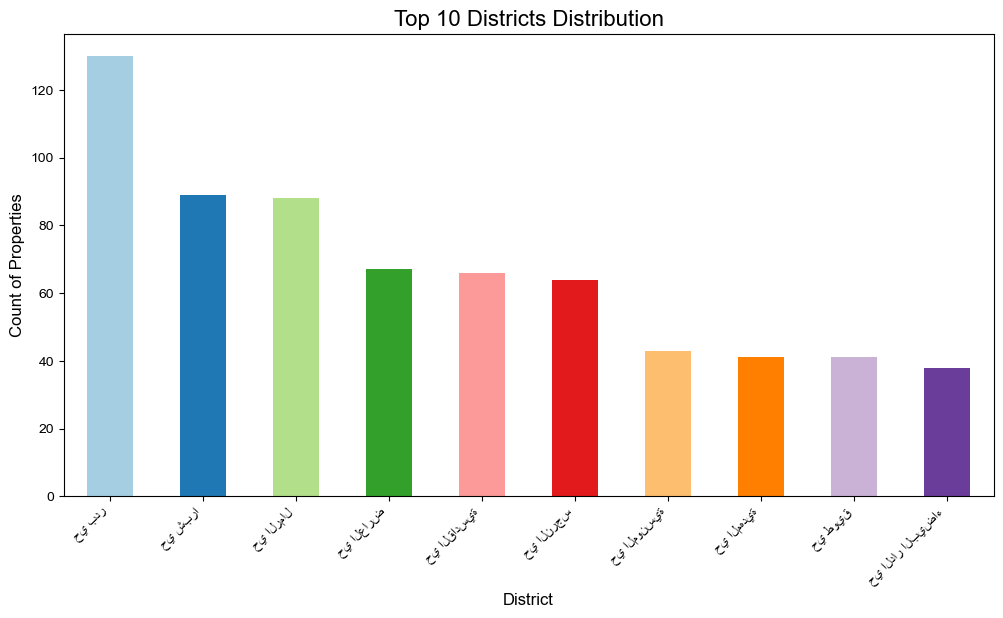

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already loaded with your dataset

# Count the number of properties in each District
district_distribution = df['District'].value_counts()

# Select top 10 most frequent districts
top_districts = district_distribution.head(10)

# Plot a bar chart for District distribution (Top 10)
plt.figure(figsize=(12, 6))
top_districts.plot(kind='bar', color=plt.cm.Paired.colors)

# Title and labels
plt.title('Top 10 Districts Distribution', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count of Properties', fontsize=12)

# Rotating x labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()
